# Projet: Chat permettant d\'aider à se pre-inscrire en ligne


Nous avons dans le fichier chatbot_dataset.csv des données de preinscription en ligne

Le fichier contient les colonnes suivantes:
    * id_chat: l'identifiant attribué à la question posée par l'utilisateur
    * Username: le nom de l'utilisateur
    * Question: Les questions posées par l'utilisateur
    * Response: Les reponses aux questions de l'utilisateur 
    * Date: Date d'envoie de chacun des questions posées par l'utilisateur

Nous allons analyser ces données pour répondre aux questions suivantes:
    * Quel est le ou les personnes qui ont le ou les plus utilisé (s) ce chatbot pendant le mois de septembre ?
    * A quelle heure les utilisateurs interagissent le plus avec le chabot ?
    * A quelle heure les utilisateurs interagissent le moins avec le chabot ?
    * Quels sont les utilisateurs qui n'ont pas obtenu de reponse à leur question ?
    * Quels les utilisateus n'ayant posés aucune question ?
    * Quels sont les questions les plus posées par l'utilsateur et pourquoi ?


Nous allons accompagner nos solutions de visualisations pertinentes afin d' améliorer l'efficacité du chatbot le mois prochain.
        



### Importer les données


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [15]:
url = 'chatbot_dataset.csv'

In [16]:
data = pd.read_csv(url,index_col=0, encoding = "ISO-8859-1")
data

,username,question,response,date
id,,,,
1,Amadou,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/02/24 03:32 PM
2,Andre,Comment fonctionne ce chabot ?,ce chatbot vous pose des questions pour collec...,09/15/24
3,Esther,Comment fonctionne ce chabot ?,ce chatbotbot vous pose des questions pour col...,09/28/24 09:19 PM
4,Corinne,Quels sont les avantages de l'utilisation de c...,ce chatbot vous permet de vous preinscrire rap...,09/09/24 03:56 AM
5,Yannick,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/21/24 05:09 PM
...,...,...,...,...
66,Celistin,Puis -je me preinscrire en ligne si je suis á ...,"Oui, vous pouvez vous preinscrire depuis n'imp...",09/01/24 10:37 PM
67,Gabriel,NaN,Bienvenue dans note communauté! Nous sommes he...,09/22/24 07:01 AM
68,Ange,Combien de temps prend la verification des doc...,La verification des documents prend environ 3-...,09/06/24 08:03 PM


In [17]:
data.head()

,username,question,response,date
id,,,,
1,Amadou,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/02/24 03:32 PM
2,Andre,Comment fonctionne ce chabot ?,ce chatbot vous pose des questions pour collec...,09/15/24
3,Esther,Comment fonctionne ce chabot ?,ce chatbotbot vous pose des questions pour col...,09/28/24 09:19 PM
4,Corinne,Quels sont les avantages de l'utilisation de c...,ce chatbot vous permet de vous preinscrire rap...,09/09/24 03:56 AM
5,Yannick,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/21/24 05:09 PM


In [18]:
data.describe()

,username,question,response,date
count,70,60,59,70
unique,46,23,28,60
top,Gabriel,Quels sont les avantages de l'utilisation de c...,ce chatbot vous permet de vous preinscrire rap...,09/18/24 12:28 AM
freq,4,10,10,6


In [19]:
data.columns

Index(['username', 'question', 'response', 'date'], dtype='object')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 1 to 70
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  70 non-null     object
 1   question  60 non-null     object
 2   response  59 non-null     object
 3   date      70 non-null     object
dtypes: object(4)
memory usage: 2.7+ KB


In [21]:
data_copy = data.copy
data_copy

<bound method NDFrame.copy of      username                                           question  \
id                                                                 
1      Amadou                         Qu'est ce que ce chatbot ?   
2       Andre                     Comment fonctionne ce chabot ?   
3      Esther                     Comment fonctionne ce chabot ?   
4     Corinne  Quels sont les avantages de l'utilisation de c...   
5     Yannick                         Qu'est ce que ce chatbot ?   
..        ...                                                ...   
66   Celistin  Puis -je me preinscrire en ligne si je suis á ...   
67    Gabriel                                                NaN   
68       Ange  Combien de temps prend la verification des doc...   
69  Alexandre      Combien de temps prend la procedure de visa ?   
70     Ismael                Puis-je annuler ma preinscription ?   

                                             response               date  
id        

## Nettoyage de la data

In [22]:
data.isnull().sum(axis=0)

username     0
question    10
response    11
date         0
dtype: int64

## Affichons un data avec toutes les lignes qui ont au moins une valeur manquante

In [23]:
val_manquantes = data[data.isnull().any(axis=1)]
val_manquantes

,username,question,response,date
id,,,,
10,Isabelle,Puis-je annuler ma preinscription ?,NaN,09/24/24 04:20 AM
19,Valerie,Le chatbot ne fonctionne pas,NaN,09/02/24 01:45 AM
25,Koffi,NaN,Bonjour ! Bienvenue ans notre chatbot de prein...,09/15/24 08:48 AM
26,Michel,Comment puis-je payer les frais de scolarité ?,NaN,09/15/24 06:20 PM
27,Aicha,NaN,Salut ! Nous sommes ravis de vous aider a vous...,09/25/24 12:05 AM
29,Claire,NaN,NaN,09/13/24 01:10 PM
30,Sylvie,Quels sont les criteres d'accessibilité pour l...,NaN,09/14/24 10:00 AM
33,Serge,J'ai des problemes pour telecharger mes docume...,NaN,09/02/24 03:32 PM
34,Eric,Comment je serai informe de la decision relati...,NaN,09/25/24 04:00 PM


## Est-ce que toutes les lignes n'ont que des valeurs manquantes

In [24]:
val_manquantes.isnull().all()

username    False
question    False
response    False
date        False
dtype: bool

## Supprimer toutes les lignes avec des valeurs manquantes: 

In [25]:
data.shape

(70, 4)

In [26]:
data.dropna(inplace=True)

In [18]:
data.shape

(50, 4)

In [200]:
data.isnull().any()

username    False
question    False
response    False
date        False
count        True
dtype: bool

In [28]:
data.describe()

,username,question,response,date
count,50,50,50,50
unique,36,21,23,44
top,David,Quels sont les avantages de l'utilisation de c...,ce chatbot vous permet de vous preinscrire rap...,09/18/24 12:28 AM
freq,3,10,10,4


In [29]:
data[data['date'] == "date"]

,username,question,response,date
id,,,,


In [27]:
data


,username,question,response,date
id,,,,
1,Amadou,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/02/24 03:32 PM
2,Andre,Comment fonctionne ce chabot ?,ce chatbot vous pose des questions pour collec...,09/15/24
3,Esther,Comment fonctionne ce chabot ?,ce chatbotbot vous pose des questions pour col...,09/28/24 09:19 PM
4,Corinne,Quels sont les avantages de l'utilisation de c...,ce chatbot vous permet de vous preinscrire rap...,09/09/24 03:56 AM
5,Yannick,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/21/24 05:09 PM
6,André,Comment puis-je me preinscrire en ligne ?,suivez les etapes du chatbot pour founir vos i...,05/09/24 11:23 AM
7,Thierry,Quels documents dois je fournir pour la preins...,Veuillez fournir une copie de votre piece d'id...,09/15/24 08:47 AM
8,Claire,Quels sont les criteres d'accessibilité pour l...,Veuilllez consulter note sibe web pour obtenir...,09/27/24 02:26 PM
9,Yannick,Quels sont les avantages de l'utilisation de c...,ce chatbot vous permet de vous preinscrire rap...,09/05/24 11:24 AM


## Supprime les lignes qui ont le mot chat Date sur Le Date Date

In [30]:
df_clean = data.drop(data.loc[data['date'] == "date", :].index)

In [31]:
df_clean.head()

,username,question,response,date
id,,,,
1,Amadou,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/02/24 03:32 PM
2,Andre,Comment fonctionne ce chabot ?,ce chatbot vous pose des questions pour collec...,09/15/24
3,Esther,Comment fonctionne ce chabot ?,ce chatbotbot vous pose des questions pour col...,09/28/24 09:19 PM
4,Corinne,Quels sont les avantages de l'utilisation de c...,ce chatbot vous permet de vous preinscrire rap...,09/09/24 03:56 AM
5,Yannick,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/21/24 05:09 PM


In [32]:
df_clean['date']

id
1     09/02/24 03:32 PM
2              09/15/24
3     09/28/24 09:19 PM
4     09/09/24 03:56 AM
5     09/21/24 05:09 PM
6     05/09/24 11:23 AM
7     09/15/24 08:47 AM
8     09/27/24 02:26 PM
9     09/05/24 11:24 AM
11    09/22/24 08:10 PM
12    09/06/24 08:06 PM
13    09/05/24 11:28 AM
14    09/20/24 09:50 AM
15    09/18/24 12:27 AM
16    09/18/24 12:27 AM
17    09/18/24 12:28 AM
18    09/24/24 04:00 AM
20    09/26/24 04:30 AM
21    09/18/24 12:28 AM
22    09/12/24 12:21 AM
23    09/20/24 08:01 PM
24    09/10/24 12:03 AM
28    09/24/24 04:59 AM
31    09/22/24 08:41 PM
32    09/05/24 11:23 AM
36    09/31/2024  16:28
37    09/10/24 07:45 AM
39    09/18/24 12:28 AM
40    09/06/24 08:06 PM
41    09/11/24 07:45 AM
43    09/08/24 05:29 AM
44    09/06/24 06:13 AM
46    09/16/24 05:35 PM
47    09/10/24 10:06 PM
48    09/18/24 12:28 AM
49    09/22/24 08:00 PM
51    09/05/24 05:08 PM
53    09/07/24 08:06 PM
55    09/19/24 01:11 AM
56    09/30/24 08:06 PM
58    09/03/24 03:20 AM
59    09/10/2

# Analyse Exploratoire proprement dite

## Quel est le ou les personnes qui ont le ou les plus utilisé (s) ce chatbot pendant le mois de septembre ?

In [33]:
df_clean  = df_clean.set_index('username')

In [34]:
df_clean.head()

,question,response,date
username,,,
Amadou,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/02/24 03:32 PM
Andre,Comment fonctionne ce chabot ?,ce chatbot vous pose des questions pour collec...,09/15/24
Esther,Comment fonctionne ce chabot ?,ce chatbotbot vous pose des questions pour col...,09/28/24 09:19 PM
Corinne,Quels sont les avantages de l'utilisation de c...,ce chatbot vous permet de vous preinscrire rap...,09/09/24 03:56 AM
Yannick,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/21/24 05:09 PM


In [35]:
df_clean.sort_index(inplace=True)

In [33]:
# data['username'].values_count()


In [37]:
# data.axis(0).sum().values.count()#sort_values(ascending=False)

In [32]:
# df_clean.sum().iloc('userna?m')

In [36]:

df4 = df_clean.groupby('username').count()["question"].sort_values(ascending=False) 
df4

username
Gabriel     3
David       3
Samuel      3
Patricia    3
Yannick     3
Valerie     2
Thomas      2
Claire      2
Fabrice     2
Ange        1
Koffi       1
Viviane     1
Thierry     1
Amoudou     1
Salenom     1
Rose        1
Pierre      1
Paul        1
Andre       1
Martin      1
Marie       1
Ismael      1
Josiane     1
Bernad      1
Isabelle    1
Amelie      1
Florence    1
Esther      1
Eric        1
André       1
Corinne     1
Chantal     1
Celistin    1
Celestin    1
Brigitte    1
Amadou      1
Name: question, dtype: int64

In [37]:
 # df5 = .groupby('use?rname').count()["question"].sort_values(ascending=False

In [38]:
df2 = max(df_clean.groupby('username').count()["question"])
# df_clean["username"].count()["question"] == df2
df2

3

In [97]:
data

,username,question,response,date,count
id,,,,,
1,Amadou,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/02/24 03:32 PM,3
2,Andre,Comment fonctionne ce chabot ?,ce chatbot vous pose des questions pour collec...,09/15/24,3
3,Esther,Comment fonctionne ce chabot ?,ce chatbotbot vous pose des questions pour col...,09/28/24 09:19 PM,3
4,Corinne,Quels sont les avantages de l'utilisation de c...,ce chatbot vous permet de vous preinscrire rap...,09/09/24 03:56 AM,3
5,Yannick,Qu'est ce que ce chatbot ?,Ce chatbot est concu pour vous aider à vous pr...,09/21/24 05:09 PM,3
6,André,Comment puis-je me preinscrire en ligne ?,suivez les etapes du chatbot pour founir vos i...,05/09/24 11:23 AM,3
7,Thierry,Quels documents dois je fournir pour la preins...,Veuillez fournir une copie de votre piece d'id...,09/15/24 08:47 AM,3
8,Claire,Quels sont les criteres d'accessibilité pour l...,Veuilllez consulter note sibe web pour obtenir...,09/27/24 02:26 PM,3
9,Yannick,Quels sont les avantages de l'utilisation de c...,ce chatbot vous permet de vous preinscrire rap...,09/05/24 11:24 AM,3


In [148]:
# df_clean['username'].sort_values(ascending=False).plt.barh(figsize=(10, 8))
df5 = pd.DataFrame(df4)
# for i in range[1,len(df5)]:
#     df5["id"]= i
# df4.columns = ['username','count']
# df4.columns["count"]= df4.columns[1]
# df4["count"] = 6
# df6 = (df4['username'] == data['username'])
df5

,question
username,
Gabriel,3
David,3
Samuel,3
Patricia,3
Yannick,3
Valerie,2
Thomas,2
Claire,2
Fabrice,2


In [41]:
data2=data.copy()

In [42]:
data2['username'].unique()

array(['Amadou', 'Andre', 'Esther', 'Corinne', 'Yannick', 'André',
       'Thierry', 'Claire', 'Patricia', 'Valerie', 'Fabrice', 'David',
       'Celestin', 'Florence', 'Marie', 'Koffi', 'Paul', 'Samuel',
       'Pierre', 'Thomas', 'Viviane', 'Josiane', 'Amoudou', 'Gabriel',
       'Isabelle', 'Chantal', 'Brigitte', 'Amelie', 'Martin', 'Salenom',
       'Bernad', 'Eric', 'Rose', 'Celistin', 'Ange', 'Ismael'],
      dtype=object)

In [57]:
# data2.iloc(axis=0).values_count()

In [43]:
# data3= data
# data3['count']=df4.loc(1)


In [75]:
data4=pd.DataFrame(data3.groupby('id')['count'].sum().sort_values(ascending=False))
# df_clean.groupby('Month')["chiffre_daffaire"].sum().sort_values(ascending=False)
data4["count"]=df_clean.count()["question"].groupby("username")
data4

AttributeError: 'numpy.int64' object has no attribute 'groupby'

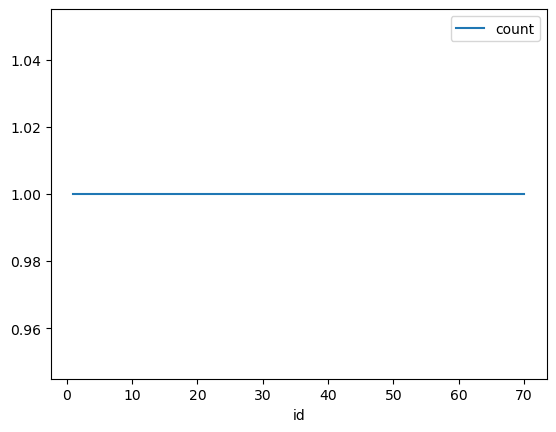

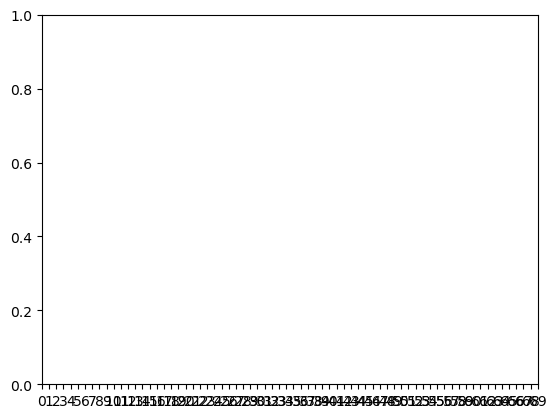

In [70]:
# X=data4.id_chat()
y=data4['count']
sns.lineplot(data4)
plt.figure(50)
plt.xticks(ticks=range(0, 70))
# plt.plot(y, y, c='red', lw=4, ls='--', alpha=0.8)
plt.show()

In [65]:
data.shape


(70, 5)

# Sklearn : Pre-processing


## 1. Encodage

In [55]:
from sklearn.preprocessing import LabelEncoder

In [65]:
y =  data['username']

encoder = LabelEncoder()
y_encode = encoder.fit_transform(y)
y_encode

array([ 0,  3, 15, 12, 35,  4, 31, 11, 35, 25, 33, 33, 16, 13,  8, 17, 25,
       23, 22, 26, 30, 27, 32, 34, 21,  2, 18, 18, 18, 32, 35, 19, 10,  7,
       11,  1, 30, 24, 13, 13, 29,  6, 14, 30, 28, 25, 16,  9,  5, 20])

## 2- Decodage

In [133]:
encoder.inverse_transform(y_encode)

array(['Amadou', 'Andre', 'Esther', 'Corinne', 'Yannick', 'André',
       'Thierry', 'Claire', 'Yannick', 'Patricia', 'Valerie', 'Valerie',
       'Fabrice', 'David', 'Celestin', 'Florence', 'Patricia', 'Marie',
       'Koffi', 'Paul', 'Samuel', 'Pierre', 'Thomas', 'Viviane',
       'Josiane', 'Amoudou', 'Gabriel', 'Gabriel', 'Gabriel', 'Thomas',
       'Yannick', 'Isabelle', 'Chantal', 'Brigitte', 'Claire', 'Amelie',
       'Samuel', 'Martin', 'David', 'David', 'Salenom', 'Bernad', 'Eric',
       'Samuel', 'Rose', 'Patricia', 'Fabrice', 'Celistin', 'Ange',
       'Ismael'], dtype=object)

## Normalisation

In [60]:
 from sklearn.preprocessing import MinMaxScaler

## MinMaxScaler

In [228]:
data_transform = data
data_transform['username'] = y_encode
data_transform['count'] = df5['question']
data_transform.drop( columns= ["response","date"])
data_transform.groupby('username').count()["question"].sort_values(ascending=False) 
# data_transforms ['username2'] = data_transform['username']
# data_transform
# data_transforms.drop(columns=['username2'], axis= 0)
# data_transforms
# ddd = [i for i in range(len(df5))]
# for i in range(len(df5)):
#     if data_transforms[i]:
#         data_transforms[i] 
# data_transforms[ddd]


username
18    3
13    3
30    3
25    3
35    3
33    2
32    2
11    2
16    2
5     1
22    1
34    1
31    1
2     1
29    1
28    1
27    1
26    1
3     1
24    1
23    1
20    1
21    1
6     1
19    1
1     1
17    1
15    1
14    1
4     1
12    1
10    1
9     1
8     1
7     1
0     1
Name: question, dtype: int64

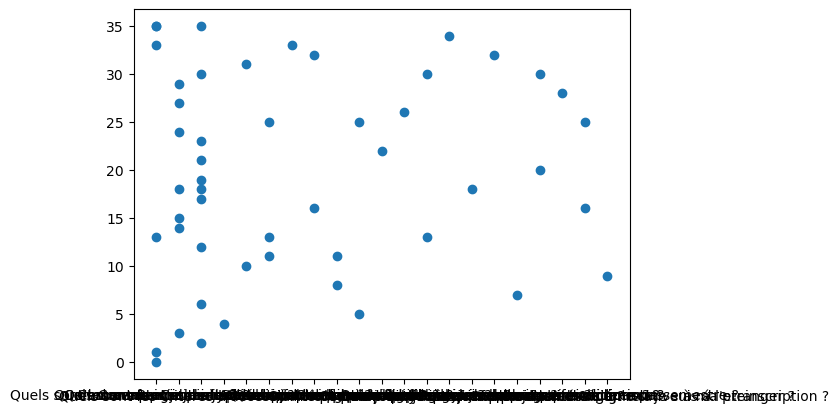

In [238]:

X_minmax = MinMaxScaler().fit_transform([y_encode,data_transform['username'] ])

plt.scatter(data_transform['question'] , data_transform['username'] )
# plt.scatter(X_minmax[data_transform["username"]], X_minmax[data_transform['username']])

## Algorithme de regression lineaire

In [46]:
from sklearn.datasets import make_regression

In [52]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=len(data4['count']), n_features=1, noise= 10)
plt.xlabel('nombre de question')
plt.ylabel('Personne')
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

NameError: name 'data4' is not defined

In [30]:
print(x.shape)
print(y.shape)

(68, 1)
(68,)


### Y: Represente le nombre de question posée par chaque etudiant

 Création de la matrice X qui contient la colonne de Biais. Pour ca, on colle l'un contre l'autre le vecteur x et un vecteur 1 (avec np.ones) de dimension égale a celle de x

In [32]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(68, 2)


## 2. Modele Linéaire

On implémente un modele F = XO,  puis on teste le modele pour voir s'il n'y a pas de bug (bonne pratique oblige). En plus, cela permet de voir a quoi ressemble le modele initial, défini par la valeur de 

In [33]:
def model(X, theta):
    return X.dot(theta)

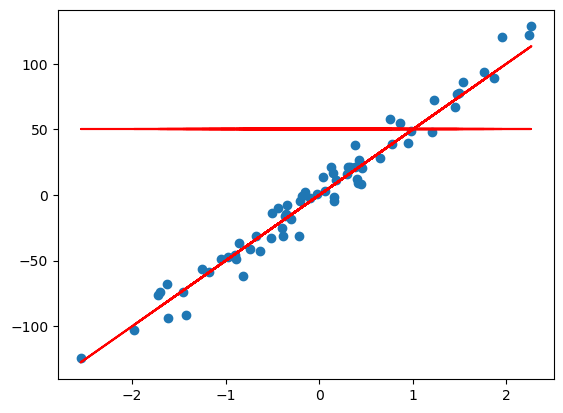

In [36]:
plt.scatter(x, y)
theta=50
plt.plot(x, model(X, theta), c='r')

# 3. Fonction Cout :  Erreur Quadratique moyenne
On mesure les erreurs du modele sur le Dataset X, y en implémenterl'erreur quadratique moyenne,  **Mean Squared Error (MSE)** en anglais.

$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $

Ensuite, on teste notre fonction, pour voir s'il n'y a pas de bug

In [37]:
len(x)

68

In [39]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [40]:
cost_function(x, x, theta)

1324.7127298197224

# 4. Gradients et Descente de Gradient
On implémente la formule du gradient pour la **MSE**

$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$

Ensuite on utilise cette fonction dans la descente de gradient:

$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$


n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [41]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [ ]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

In [42]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

# Phase d'entrainement
On définit un **nombre d'itérations**, ainsi qu'un **pas d'apprentissage $\alpha$**, et c'est partit !

Une fois le modele entrainé, on observe les resultats par rapport a notre Dataset

In [43]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(x,x, theta, learning_rate, n_iterations)

In [134]:
theta_final # voici les parametres du modele une fois que la machine a été entrainée

array([[1.00135038]])

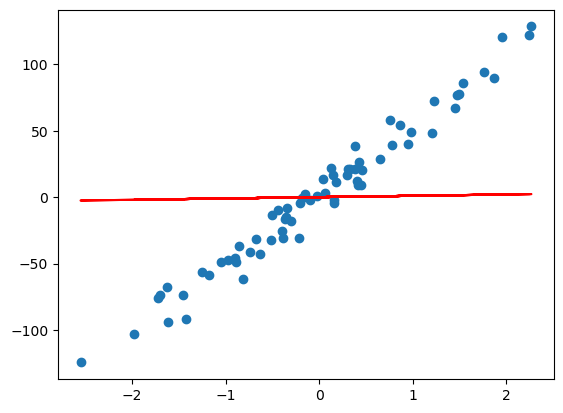

In [44]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(x, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# Courbes d'apprentissage
Pour vérifier si notre algorithme de Descente de gradient a bien fonctionné, on observe l'évolution de la fonction cout a travers les itérations. On est sensé obtenir une courbe qui diminue a chaque itération jusqu'a stagner a un niveau minimal (proche de zéro). Si la courbe ne suit pas ce motif, alors le pas **learning_rate** est peut-etre trop élevé, il faut prendre un pas plus faible.

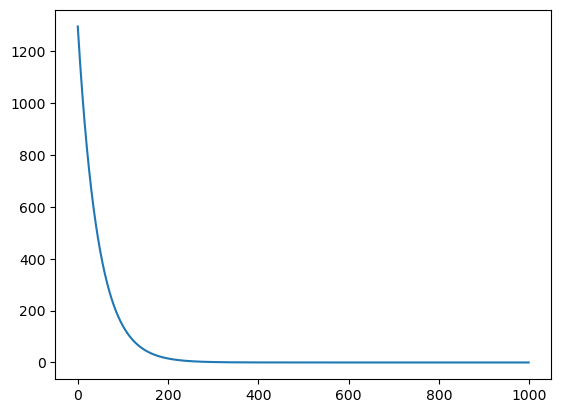

In [45]:
plt.plot(range(n_iterations), cost_history)

# 7. Evaluation finale
Pour évaluer la réelle performance de notre modele avec une métrique populaire (pour votre patron, client, ou vos collegues) on peut utiliser le **coefficient de détermination**, aussi connu sous le nom $R^2$. Il nous vient de la méthode des moindres carrés. Plus le résultat est proche de 1, meilleur est votre modele

In [146]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [147]:
coef_determination(y, predictions)

-67.90766059932749

# 24/30 Apprentissage Non-Supervisé

## 1. K-Means Clustering

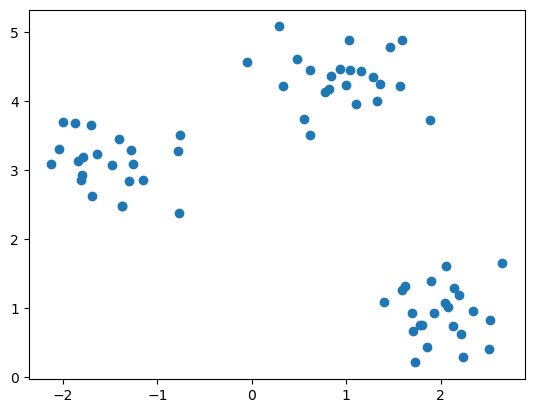

In [149]:
# Génération de données
X, y = make_blobs(n_samples=len(x), centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [151]:
from sklearn.cluster import KMeans

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

-20.60139833068814

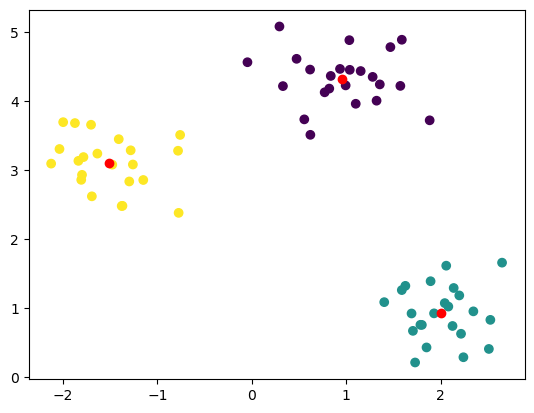

In [152]:
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
# model.inertia_
model.score(X)